# Hough Transform: OpenCV

The Hough Transform is a fundamental technique in computer vision and image processing for detecting geometric shapes within an image, particularly when those shapes can be described by mathematical equations. The Hough Transform is used to identify lines, circles, ellipses, and other shapes in an image, even when they may be partially obscured, broken, or distorted. The most commonly known variant of the Hough Transform is the one used for detecting lines, known as the Hough Line Transform.

Here's an overview of the Hough Transform:

1. **Hough Line Transform**:
   - The Hough Line Transform is used to detect straight lines within an image.
   - Each pixel in the image is transformed into a parameter space, often called the "Hough space" or "accumulator space," where each point represents a possible line in the original image.
   - The equation of a line in the Hough space is represented as ρ = x * cos(θ) + y * sin(θ), where (ρ, θ) are the parameters representing the line.
   - Each edge pixel in the original image contributes to possible lines in the Hough space by voting for all possible (ρ, θ) pairs that pass through that pixel.
   - Peaks in the accumulator space correspond to lines in the original image.

2. **Hough Circle Transform**:
   - The Hough Circle Transform is used to detect circles within an image.
   - It works similarly to the Hough Line Transform but searches for circles with specific radii instead of straight lines.
   - Each circle is parameterized by its center coordinates (x, y) and its radius (r).
   - The accumulator space is used to detect peaks corresponding to circles.

3. **Hough Ellipse Transform**:
   - The Hough Ellipse Transform is an extension of the Hough Circle Transform that can detect ellipses.
   - Ellipses are described by multiple parameters, including center coordinates, major and minor axes, and orientation angle.
   - The Hough Ellipse Transform accumulates votes in parameter space to detect ellipses.

4. **Generalization**:
   - The Hough Transform can be generalized to detect other shapes and curves by defining appropriate equations for the parameter space.

5. **Applications**:
   - Hough Transform is widely used in computer vision applications such as line detection in edge images, object recognition, and shape analysis.
   - It is robust to noise and can identify patterns even when they are incomplete or have gaps.

6. **Parameter Tuning**:
   - Proper parameter tuning is crucial for the success of Hough Transform-based methods. Parameters like threshold values and the resolution of the accumulator space can affect detection results.

The Hough Transform is a powerful tool for extracting structured information from images and is often a key component in many computer vision algorithms and applications. It is particularly valuable in scenarios where feature extraction or object recognition requires the identification of specific geometric shapes within an image.

Implementing the Hough Transform for line detection using OpenCV in Python is straightforward. Here's a basic example of how to perform line detection using OpenCV's Hough Line Transform:

```python
import cv2
import numpy as np

# Load an image from file
image = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray_blurred, 50, 150, apertureSize=3)

# Apply the Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the line on the image

# Display the original image with detected lines
cv2.imshow('Hough Line Transform', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this example:

1. We load an image from a file (replace `'image.jpg'` with the path to your image).

2. We convert the image to grayscale because the Hough Line Transform typically works on grayscale images.

3. Gaussian blur is applied to reduce noise and enhance edge detection.

4. The Canny edge detector is used to find edges in the image.

5. The `cv2.HoughLines()` function is used to apply the Hough Line Transform. It takes the edges image, the resolution of the accumulator (rho and theta values), and a threshold parameter. You may need to adjust the threshold depending on your image and the number of lines you expect to detect.

6. Detected lines are then drawn on the original image.

7. The final result is displayed using `cv2.imshow()`.

This code demonstrates how to use the Hough Line Transform in OpenCV to detect lines in an image. Adjust the parameters and preprocessing steps as needed for your specific image and application.

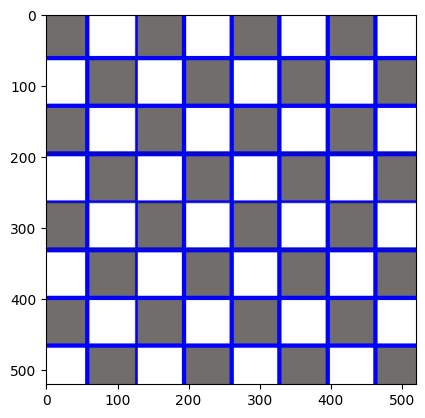

In [4]:
import cv2
import numpy as np

# Load an image from file
image = cv2.imread('Images/chess.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray_blurred, 50, 150, apertureSize=3)

# Apply the Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=250)

# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the line on the image

# Display the original image with detected lines
#cv2.imshow('Hough Line Transform', image)
import matplotlib.pyplot as plt
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
img = cv2.imread('Images/chess.jpg')
img = cv2.resize(img,(400,400))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,10,200,apertureSize = 3)

#function accept parameter(img,rho,theta)
lines = cv2.HoughLines(edges,1,np.pi/180,250)
#rho value -- distance resolution of pixels
#thetha - angle resolution
#line threshold
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2)

cv2.imshow("edge",edges)
cv2.imshow("lines",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

The `cv2.HoughLinesP()` function in OpenCV is an extension of the Hough Line Transform (`cv2.HoughLines()`) that is used to detect lines in an image. Unlike `cv2.HoughLines()`, which returns lines in a polar coordinate system, `cv2.HoughLinesP()` returns line segments with endpoints (x1, y1) and (x2, y2). Here's how to implement the Hough Line Transform using `cv2.HoughLinesP()` in Python:

```python
import cv2
import numpy as np

# Load an image from file
image = cv2.imread('image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray_blurred, 50, 150, apertureSize=3)

# Apply the Hough Line Transform to detect line segments
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected line segments on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the line segment on the image

# Display the original image with detected line segments
cv2.imshow('Hough Line Transform (Probabilistic)', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this code:

1. We load an image from a file (replace `'image.jpg'` with the path to your image).

2. We convert the image to grayscale because the Hough Line Transform typically works on grayscale images.

3. Gaussian blur is applied to reduce noise and enhance edge detection.

4. The Canny edge detector is used to find edges in the image.

5. The `cv2.HoughLinesP()` function is used to apply the Hough Line Transform (Probabilistic). It takes the edges image, the resolution of the accumulator (rho and theta values), a threshold parameter, `minLineLength`, and `maxLineGap`. `minLineLength` and `maxLineGap` control the minimum and maximum length of the detected line segments, respectively.

6. Detected line segments are then drawn on the original image.

7. The final result is displayed using `cv2.imshow()`.

This code demonstrates how to use the Hough Line Transform (Probabilistic) in OpenCV to detect line segments in an image. Adjust the parameters and preprocessing steps as needed for your specific image and application.

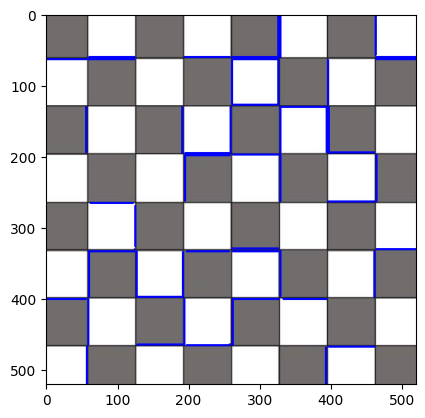

In [12]:
import cv2
import numpy as np

# Load an image from file
image = cv2.imread('Images/chess.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray_blurred, 50, 150, apertureSize=3)

# Apply the Hough Line Transform to detect line segments
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200, minLineLength=0, maxLineGap=0)

# Draw the detected line segments on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Draw the line segment on the image

# Display the original image with detected line segments
#cv2.imshow('Hough Line Transform (Probabilistic)', image)
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
